In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [2]:
data = pd.read_csv('C:\\Users\\Administrator\\Desktop\Folds5x2_pp.csv')

In [4]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
data.shape

(9568, 5)

In [8]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.25)#将数据分为训练数据和测试数据默认测试数据占比25%

In [23]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [25]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)#训练数据训练

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print (linreg.intercept_)
print (linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [27]:
#PE=447.06297099−1.97376045∗AT−0.23229086∗V+0.0693515∗AP−0.15806957∗RH

In [37]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE(均方差（Mean Squared Error）)
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE(均方根差(Root Mean Squared Error))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.080401202073897
RMSE: 4.481116066570236


In [32]:
#交叉验证
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 20.795597461943107
RMSE: 4.560219014690315


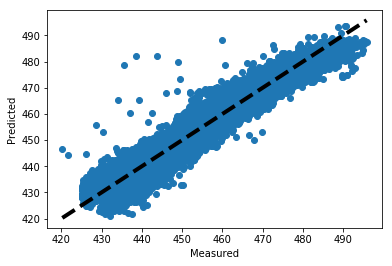

In [33]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

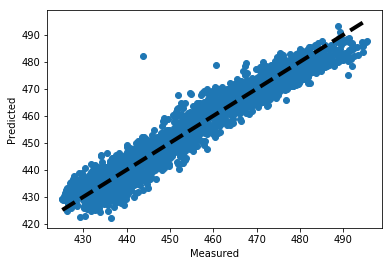

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()